In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv('Admission_Predict - Admission_Predict.csv')
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [6]:
df.shape # shape of dataset


(400, 9)

In [7]:
df.head()  #top 5 lines print

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.75)
# df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])
df['Chance of Admit']=bi.fit_transform(df[['Chance of Admit']])


In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [10]:
x=df.drop('Chance of Admit', axis =1)
y=df['Chance of Admit']


In [11]:
x
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit, Length: 400, dtype: float64

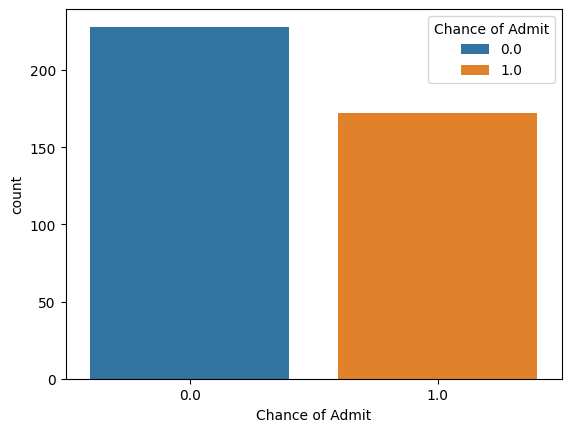

In [12]:
y.astype('int')
sns.countplot(x=y,hue=y);

In [13]:
y=y.astype('int')
y.value_counts()

Chance of Admit
0    228
1    172
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test=train_test_split(x,y,random_state=0 , test_size=0.25)


In [15]:
x_train.shape
x_test.shape
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(random_state=0)

In [18]:
y_pred=classifier.predict(x_test)

result = pd.DataFrame({'actual': y_test,'predicted':y_pred})

In [19]:
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [20]:
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score
from sklearn.metrics import classification_report

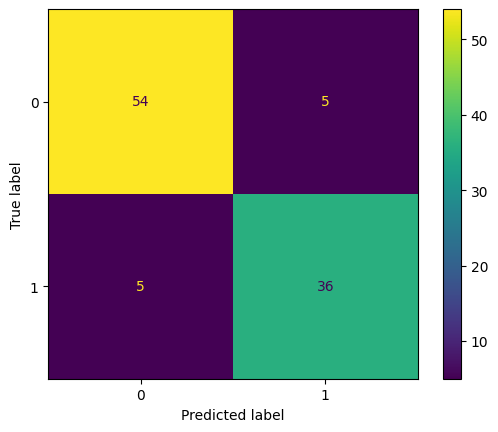

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [22]:
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [23]:
new=[[136,314,109,4,3.5,4.0,8.77,1]]
classifier.predict(new)[0]

c:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


np.int64(1)

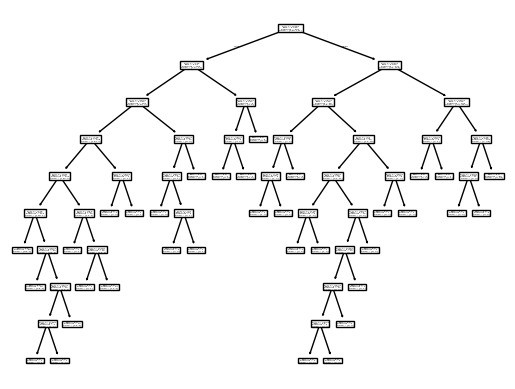

In [24]:
from sklearn.tree import plot_tree
plot_tree(classifier, );

[Text(0.565625, 0.95, 'x[6] <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]'),
 Text(0.365625, 0.85, 'x[5] <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]'),
 Text(0.465625, 0.8999999999999999, 'True  '),
 Text(0.25625, 0.75, 'x[1] <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]'),
 Text(0.1625, 0.65, 'x[4] <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]'),
 Text(0.1, 0.55, 'x[6] <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]'),
 Text(0.05, 0.45, 'x[4] <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.025, 0.35, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(0.075, 0.35, 'x[1] <= 310.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.05, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.1, 0.25, 'x[1] <= 311.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.075, 0.15, 'x[6] <= 8.355\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05, 0.05, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1, 0.0

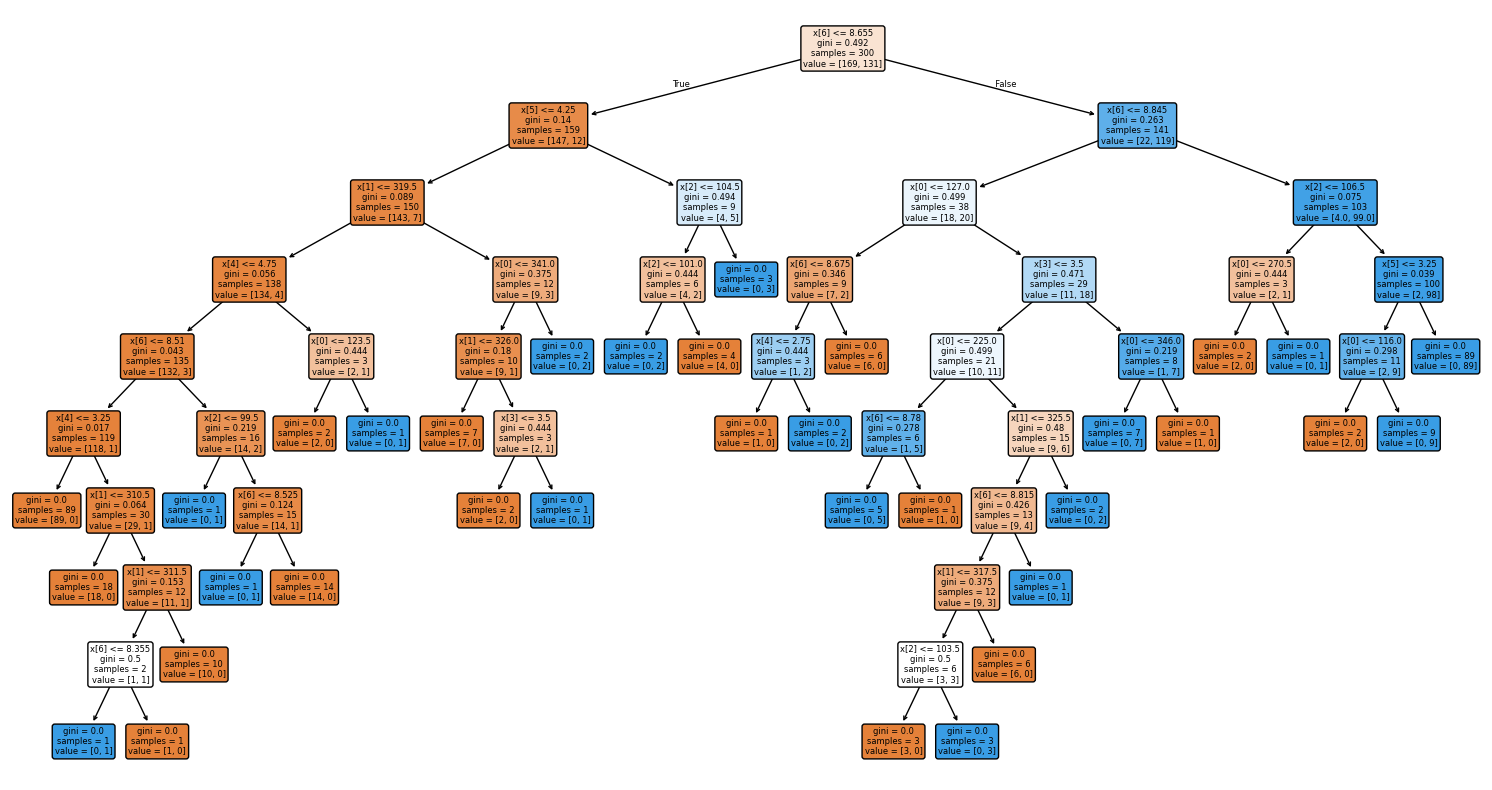

In [36]:
plt.figure(figsize=(19,10))
plot_tree(classifier, fontsize=6, filled=True, rounded=True)

In [26]:
import matplotlib.pyplot as plt


[Text(0.565625, 0.95, 'CGPA <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]\nclass = NA'),
 Text(0.365625, 0.85, 'LOR <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]\nclass = NA'),
 Text(0.465625, 0.8999999999999999, 'True  '),
 Text(0.25625, 0.75, 'GRE Score <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]\nclass = NA'),
 Text(0.1625, 0.65, 'SOP <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]\nclass = NA'),
 Text(0.1, 0.55, 'CGPA <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]\nclass = NA'),
 Text(0.05, 0.45, 'SOP <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]\nclass = NA'),
 Text(0.025, 0.35, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]\nclass = NA'),
 Text(0.075, 0.35, 'GRE Score <= 310.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]\nclass = NA'),
 Text(0.05, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = NA'),
 Text(0.1, 0.25, 'GRE Score <= 311.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = NA'),
 Text(0.075, 0.15, 'CG

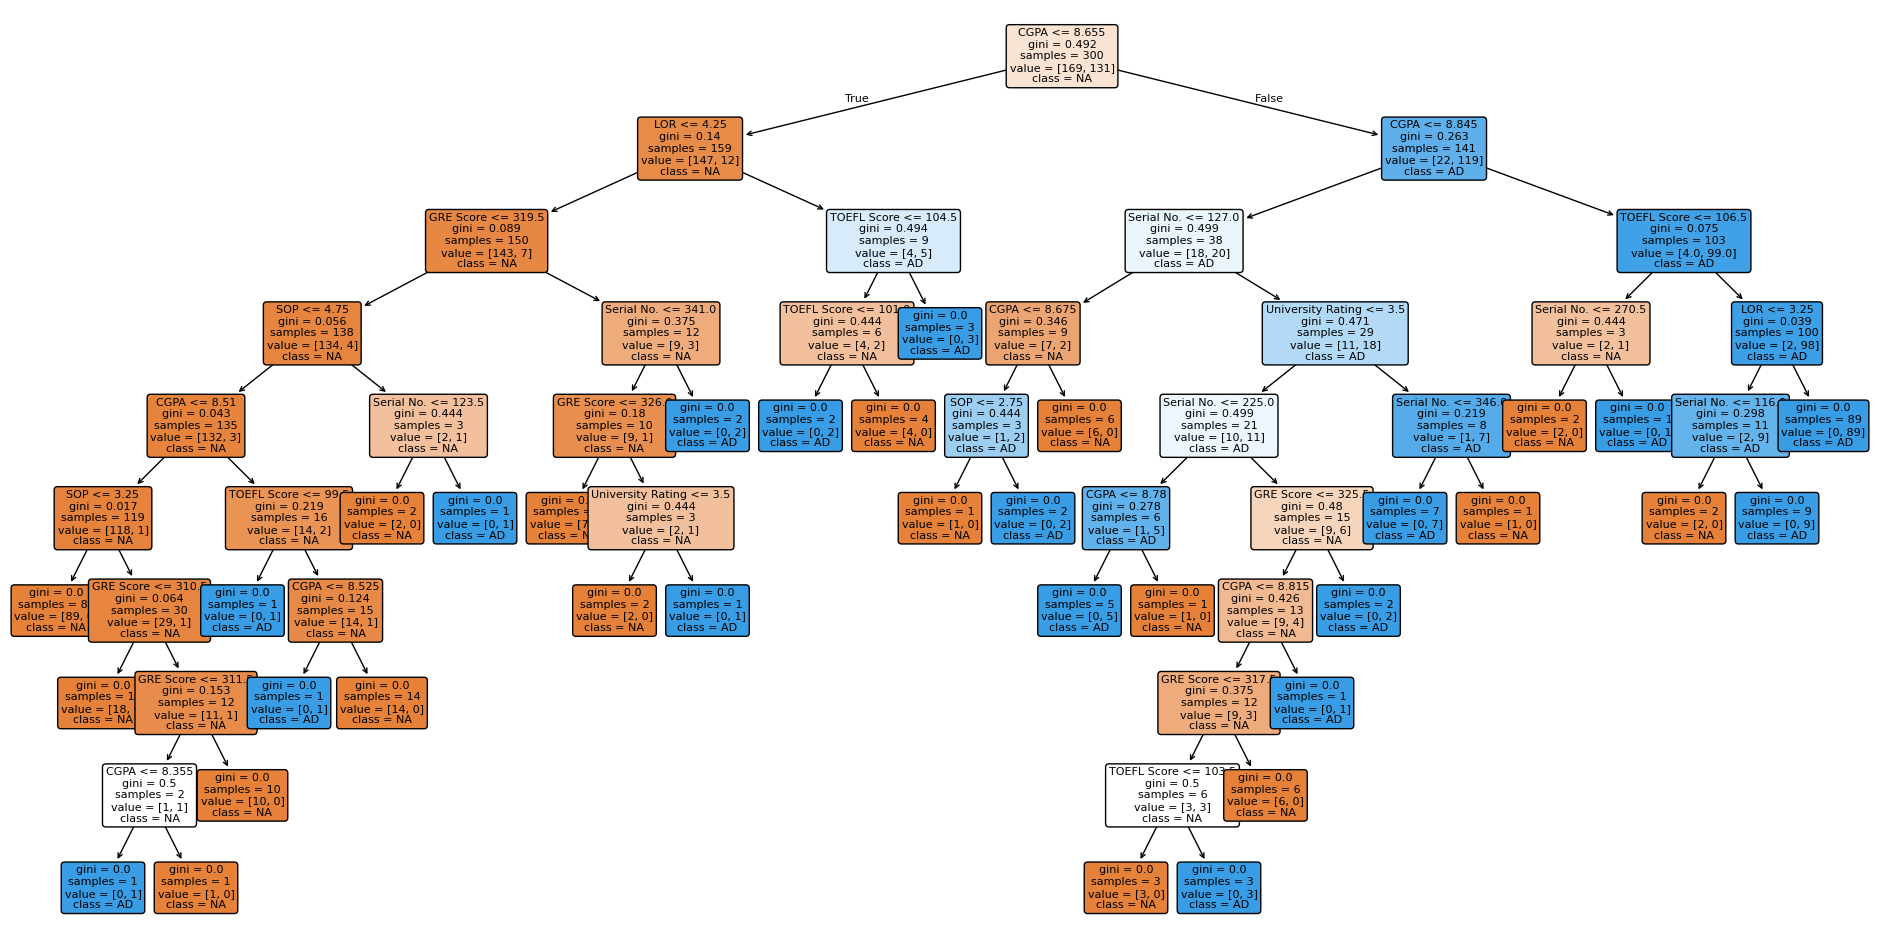

In [31]:
plt.figure(figsize=(24,12))
plot_tree(classifier, fontsize=8, filled=True, rounded=True,feature_names=x.columns, class_names=['NA','AD'] )
